# Intro into tensorflow

In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
import matplotlib.pyplot as plt
tf.keras.backend.set_floatx('float64')
tf.__version__

'2.4.1'

## Preprocessing Data
Let's start with loading the california housing dataset

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

We first do a train-test split

In [3]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [4]:
X_train.shape

(11610, 8)

Let's look at the data. We have 8 features.

In [5]:
X_train[0]

array([ 3.36610000e+00,  3.10000000e+01,  5.58648111e+00,  1.02982107e+00,
        1.64000000e+03,  3.26043738e+00,  3.80500000e+01, -1.21980000e+02])

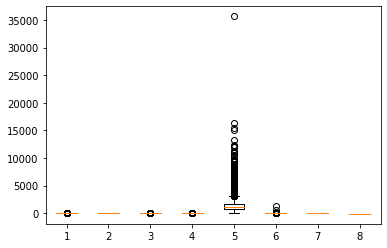

In [6]:
plt.boxplot(X_train);

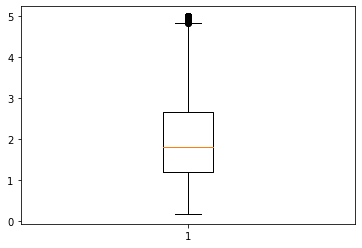

In [7]:
plt.boxplot(y_train);

The X is obviously not scaled. The y is in the range $[0,5]$. We could scale the y to z-scores with mean 0, sd 1, but it isn't really necessary because it is already so close to that range. In addition to that, scaling the y (if it is a single number) has much less of an impact on the training, than scaling 30 features that have very different values, because the model has to figure out how these 30 features relate to each other. If the values are scaled, that task becomes much easier.

So we start with scaling X. Note how we fit only on the X_train, and transform everything with that fit. Do you understand why that is necessary?

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

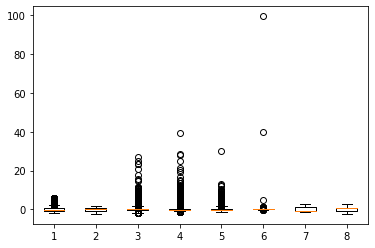

In [9]:
plt.boxplot(X_train);

Now, the data is ready for the model. IRL, you might want to check the outlier on feature 6, and might want to do more visualizations on the data to get familiar with the dataset. 

But for now, we will ignore that, because this lesson is not about visualization but about building deep neural networks and we know the dataset is preprocessed.

# Building a first model
We will start with a simple dense layer.

In [10]:
from tensorflow.keras.layers import Dense

First, have a look at the first observation with 8 features.

In [11]:
X_train[0]

array([-0.26679434,  0.18425182,  0.09007008, -0.16930479,  0.19363422,
        0.01381778,  1.14164887, -1.20834146])


## Functional API
Now, we let this flow through a first layer with just one neuron. This is essentially a linear model. The style `x = Dense(1)(x)` is called the functional API. We will see that we have other options, too.

In [12]:
x = Dense(1)(X_train)
X_train.shape, x.shape

((11610, 8), TensorShape([11610, 1]))

Do you understand what is happening in terms of shapes? What does it mean to go from (11610,8) -> (11610, 1) ?
Lets expand to 30 neurons.

In [13]:
x = Dense(30)(X_train)
X_train.shape, x.shape

((11610, 8), TensorShape([11610, 30]))

Ok, and do you understand what this means?

As you can see, we had about 11k observations, with 8 featurs. The dense layers pulls that through a first layer of nodes. We end with 30 features. That is more than we started with! Let's have a look at the first observation:

In [14]:
x[0]

<tf.Tensor: shape=(30,), dtype=float64, numpy=
array([-0.0866134 ,  0.32367382, -0.80869658, -0.5458938 ,  0.37760004,
       -0.04026134, -0.27121975,  0.85294867, -0.60635667,  0.70012993,
       -0.65233498, -0.13029798, -0.76334604,  0.22983181, -0.2237961 ,
       -0.19301708,  0.58986741,  0.14251634,  0.01217836,  0.24860538,
       -0.45633171, -0.28953859,  0.41617939, -0.01824403,  0.25721927,
        0.01865076, -0.36650858,  0.69934373,  0.12994225, -0.73782494])>

But, we have learned that what makes neural networks special, is the added activation. If you check the documentation of the [Dense layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) you can see that the default activation is `None`. The activations we can use are listed in the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/activations) as well. So let's pick the default 'sigmoid'.

In [18]:
x = Dense(30, activation='sigmoid')(X_train)
X_train.shape, x.shape

((11610, 8), TensorShape([11610, 30]))

In [19]:
x[0]

<tf.Tensor: shape=(30,), dtype=float64, numpy=
array([0.44059095, 0.53383201, 0.50004449, 0.61704501, 0.50481533,
       0.56620706, 0.49787721, 0.48359977, 0.46465552, 0.54273763,
       0.56333973, 0.64610239, 0.48661869, 0.38986847, 0.47973143,
       0.48536521, 0.58525592, 0.71143014, 0.68591411, 0.59571726,
       0.65934068, 0.42897074, 0.4457661 , 0.36236861, 0.45516389,
       0.53912777, 0.43356051, 0.49394607, 0.52798655, 0.68702241])>

Do you understand what has changed?

Of course, this Dense layers is using random weights, because it has not learned anything yet. This is just to show you that it works. In fact, we just made 30 linear models, where every model reacts differently to a combination of input.

Because we want the outcome to be a single number, we feed the output of that layer into a next layer with just one neuron.

In [20]:
output = Dense(1)(x)
output[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.95470317])>

You have just build your first neural network, compleet with activation functions!

Note how the dense layer handles 2D data (e.g., images)

In [21]:
import numpy as np
m = np.ones((100, 10,10))
m = Dense(1)(m)
m.shape

TensorShape([100, 10, 1])

We now have 100 observations, each a 10x1 matrix. While that might be what you want (e.g. if you would use convolutional layers. We will come to those in a few lessons), that chance is much bigger that for a simple dense neural network you want something like this:

In [22]:
from tensorflow.keras.layers import Flatten
m = np.ones((100, 10,10))
m = Flatten()(m)
print("after flatten shape:", m.shape)
m = Dense(1)(m)
print("after Dense shape:",m.shape)

after flatten shape: (100, 100)
after Dense shape: (100, 1)


The `Flatten()` layer changes every 10x10 observation into a vector of length 100. This is how we handled the MNIST in the previous lesson too: we just changed the 28x28 images into a vector of length 784.

This vector is passed on to a Dense layer with just one node (`Dense(1)`), and thus outputs just one number for every observation. 

If you change the amount of nodes in the dense layer from 1 to some other number (eg `Dense(10)`), that other number will be the new vector-length the layer outputs.

So, while we have a calculation running with 
```
x = Dense(30, activation='sigmoid')(X_train)
x = Dense(1)(x)
```

We don't have a complete model yet. To do that, we have multiple options. In the functional API, we can create a model like this:

In [23]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
input = Input(shape=X_train.shape[1:])
x = Dense(30, activation='sigmoid')(input)
output = Dense(1)(x)

model = Model(inputs=[input], outputs=[output])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_8 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


Note a few things:

1. We specify the input shape while removing the first number with an `Input()` layer. We ommit the amount of observations we have in the shape specification. The shape of a single instance of trainingdata is a vector of size 8. So we use `X.shape[1:]`. In the model you see `(None, 8)` which means your data has this shape, and the first dimension is not specified. This is usefull, because we don't want to fix the amount of observations.
2. The flow of information goes from **right to left**. `input` goes through the first `Dense(30)` layer, resulting in x, which is the input for the next `Dense(1)` layer.
3. While specifying the model, we need to specify the inputs and outputs as a list, even though we have just one item.
4. We could have used an activation in the last layer. For example, if we required our output values to be in the range $[0,1]$ we could have used a sigmoid activation in the last layer as well. In this case, we dont want that, because our y values range up to 5.
5. We start with 8 features, expand to 30 dimensions, and end with a single prediction. 

## Sequential API
Another way to stitch this together is with the Sequential API. Let's use another activation, just to show you how that works.

In [35]:
from tensorflow.keras.models import Sequential
model = Sequential([
    Dense(30, activation='relu', input_shape = X_train.shape[1:]),
    Dense(1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


While the models are equivalent, you can do things with the Functional API that you can't do with the Sequential API (like defining multiple inputs and outputs). However, usually, the Sequential is just fine and is a little bit easier to set up.

In both the Sequential and Functional case, we end up with a model that we will need to compile.

When we do that, we specifying a loss (in this case, Mean Square Error) and an optimizer (Stochastic Gradient Descent). We can also add additional metrics, in this case, a Mean Absolute Error and Mean Absolute Percentage Error. You can find an overview of all losses in the [tensorflow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

Note the difference between a metric, and a loss function! This is important, because it can ruin your model if you confuse the two. The loss function is for the model to learn, and should be optimized for gradient descent. The performance metric is often a human-readable metric to evaluate the model. Note how we can toss in multiple metrics, because it has no impact on the learning of the model.

In [36]:
model.compile(loss="mse", optimizer='sgd', metrics=['mae', 'mape'])

And with this, we can start the learning. Let's do this for 20 epochs (rounds of learning).

In [37]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.4446 - mae: 0.8496 - mape: 46.6892 - val_loss: 1.0435 - val_mae: 0.5724 - val_mape: 32.7118
Epoch 2/20
363/363 [==============================] - 0s 843us/step - loss: 0.6590 - mae: 0.5358 - mape: 31.1541 - val_loss: 0.5954 - val_mae: 0.5220 - val_mape: 29.1952
Epoch 3/20
363/363 [==============================] - 0s 871us/step - loss: 0.5068 - mae: 0.5056 - mape: 28.7754 - val_loss: 0.4480 - val_mae: 0.4791 - val_mape: 27.2060
Epoch 4/20
363/363 [==============================] - 0s 846us/step - loss: 0.4507 - mae: 0.4750 - mape: 27.0710 - val_loss: 0.4383 - val_mae: 0.4608 - val_mape: 26.3260
Epoch 5/20
363/363 [==============================] - 0s 856us/step - loss: 0.4174 - mae: 0.4532 - mape: 25.3507 - val_loss: 0.4100 - val_mae: 0.4533 - val_mape: 25.3026
Epoch 6/20
363/363 [==============================] - 0s 894us/step - loss: 0.4108 - mae: 0.4485 - mape: 25.1271 - val_loss: 0.3961 - val_mae: 0.4476 - 

We can see the loss drop, as well as the validation loss. This learning process can be easily visualized. The output is a tensorflow history object. We can inspect `history.history` which is a dictionary

In [38]:
type(history.history)

dict

In [39]:
history.history.keys()

dict_keys(['loss', 'mae', 'mape', 'val_loss', 'val_mae', 'val_mape'])

The dictionary has keys with all the information we want. Let's plot the loss and the val_loss side by side.

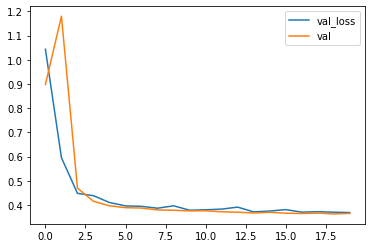

In [40]:
import matplotlib.pyplot as plt 
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='val')
plt.legend()

And the mape

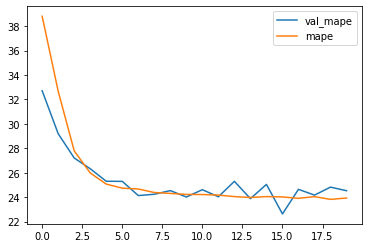

In [41]:
plt.plot(history.history['val_mape'], label='val_mape')
plt.plot(history.history['mape'], label='mape')
plt.legend()

Do you understand what you are looking at? What does the difference between the two implies?

And we can make predictions, or evaluate with the testset.

In [42]:
yhat = model.predict(X_test)
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 574us/step - loss: 0.3724 - mae: 0.4336 - mape: 25.5864


[0.372406880753909, 0.43355839113978045, 25.58635895842147]

And let's compare a prediction with an actual value.

In [49]:
yhat[0], y_test[0]

(array([2.17475866]), 2.063)

# Other network shapes
We saw networks with a single input and output. But sometimes you would want to have more then one input, or output. That can be done with the Functional API:

In [44]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
input1 = Input(shape=X_train.shape[1:])
input2 = Input(shape=X_train.shape[1:])
x1 = Dense(30, activation='relu')(input1)
x2 = Dense(30, activation='relu')(input2)
x = tf.concat([x1, x2], 1)
output = Dense(1)(x)

model = Model(inputs=[input1, input2], outputs=[output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 30)           270         input_4[0][0]                    
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 30)           270         input_5[0][0]                    
____________________________________________________________________________________________

Here, we created two inputs, each going into their own, separate `Dense(30)` layer. Each of those outputs a vector of length 30. Note how we have to take care not to overwrite them. So we use `x1` and `x2`. The outputs are concatenated into a vector of lengthe 60, and fed into a `Dense(1)` layer. Let's say we want to output the x layer in an earlier stage, that can be done like this:

In [45]:
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
input1 = Input(shape=X_train.shape[1:])
input2 = Input(shape=X_train.shape[1:])
x1 = Dense(30, activation='relu')(input1)
x2 = Dense(30, activation='relu')(input2)
x = tf.concat([x1, x2], 1)
early_output = Dense(1)(x)
x = Dense(30, activation='relu')(x)
x = Dense(30, activation='relu')(x)
output = Dense(1)(x)

model = Model(inputs=[input1, input2], outputs=[output, early_output])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 30)           270         input_6[0][0]                    
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 30)           270         input_7[0][0]                    
____________________________________________________________________________________________

Note, that Tensorflow will use the same loss function for both outputs.  If you dont want that, you will need to specify multiple losses, and if you don't want the losses to be added, you should add weights too.

Also note, how we can reuse the variable `x` after we no longer have two datastreams we want to keep separate.

In [26]:
model.compile(loss=['mape', 'mse'], loss_weights=[0.9, 0.1])

However, these are already fairly complex models. Usually, you don't need to make things this complex. I just want you to know that you can do it like this, if you ever have the need to do so.

In this example, the `output` has a `mape` loss, the `early_output` an `mse` loss. The first one is weighted 0.9, the second one 0.1.

# Finetuning hyperparameters 
But creating a network is something that needs many iterations, normally. So, we would want to keep track of all the changes we make, and to compare them. Having to create matplotlib plots is not the best way to do that. We will use tensorboard to keep track. In addition, we want don't want to stop to soon, but we also want to avoid overfitting by training too long. Earlystopping is an easy way to do so.

In [50]:
%load_ext tensorboard
import datetime
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
#!rm -rf logs/ #this cleansup the logsdir on UNIX systems (e.g. non windows systems)

The EarlyStopping keeps an eye at the validation set. It the validation set is not improving for more then 10 epochs, it aborts training and restores the last best epoch.

In [51]:
tf.random.set_seed(42)
log_dir = "logs/fit/" + "single_layer"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


model = Sequential([
    Dense(30, activation='relu', input_shape = X_train.shape[1:]),
    Dense(1)
])
model.compile(loss="mse", optimizer='sgd')
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[tensorboard_callback, early_stop], verbose = 0)
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 487us/step - loss: 0.3525


0.35248768327310104

Usually, I would advise to use tensorboard. Note how I add the tensorboard_callback to `callbacks` while fitting the model.

There are multiple ways to open tensorboad.
## locally
1. If you run it locally, you can easily open it from inside the jupyter notebook with `%tensorboard --logdir /logs/fit`
2. If you don't run it inside a browser, but in VS code, will probably need to specify the host and port. `%tensorboard --logdir=./logs/fit --host localhost --port 6006`. You can then start a browser and go to http://localhost:6006
3. You can open tensorboard from the terminal. navigate to the directory where your logs are located, and run the command `tensorboard --logdir logs`. After that, you can open a browser at http://localhost:6006

## jupyterhub
On the jupyterhub, it is possible to open a tensorboad, but only with tensorflow 2.1.0. While we could downgrade tensorflow, this breaks the keras-tuner we will be using later on in this notebook. While tensorboard is really preferable to matplotlib, we will have to work around that on the jupyterhub. I created a `plot_result` function as a workaround.

In [52]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

def plot_results(result, ymin= 0, ymax=None, yscale='linear', moving=None, alpha=0.5):
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
    move = type(moving) == int

    for key in result.keys():
        loss = result[key].history['loss']
        if (move):
            z = movingaverage(loss, moving)
            z = np.concatenate([[np.nan]*moving, z[moving:-moving]])
            color = next(ax1._get_lines.prop_cycler)['color']
            ax1.plot(z, label = key, color = color)
            ax1.plot(loss, label = key, alpha = alpha, color=color)
        else:
            ax1.plot(loss, label = key)
        
        ax1.set_yscale(yscale)
        ax1.set_ylim(ymin, ymax)
        ax1.set_title('train')    

        valloss = result[key].history['val_loss']
        
        if (move):
            z = movingaverage(valloss, moving)
            z = np.concatenate([[np.nan]*moving, z[moving:-moving]])
            color = next(ax2._get_lines.prop_cycler)['color']
            ax2.plot(z, label = key, color=color)
            ax2.plot(valloss, label = key, alpha = alpha, color=color)
        else:
            ax2.plot(valloss, label = key)
   
        ax2.set_yscale(yscale)
        ax2.set_ylim(ymin, ymax)
        ax2.set_title('test')
    
    plt.legend()
   

In [53]:
result = {}
result['single_layer'] = history

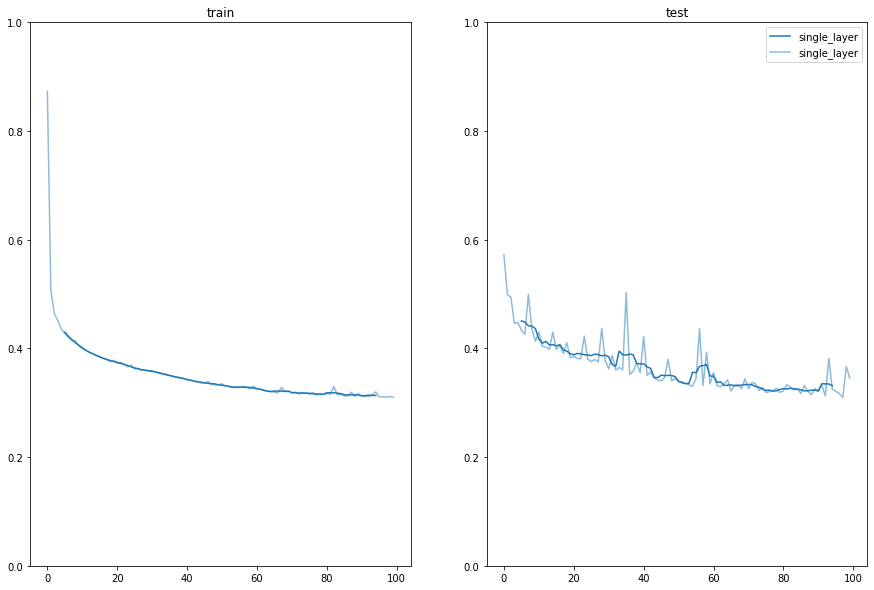

In [54]:
plot_results(result, ymax = 1, yscale='linear', moving = 5)

So, this is our baseline model. Let's try to improve the result. Maybe more layers? Let's add three.

In [55]:
tf.random.set_seed(42)
log_dir = "logs/fit/" + "three_layers"
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

model = Sequential([
    Dense(30, activation='relu', input_shape = X_train.shape[1:]),
    Dense(30, activation='relu'),
    Dense(30, activation='relu'),
    Dense(1)
])
model.compile(loss="mse", optimizer='sgd')
result['three_layers'] = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[early_stop], verbose = 0)
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 513us/step - loss: 0.2833


0.28327752691368724

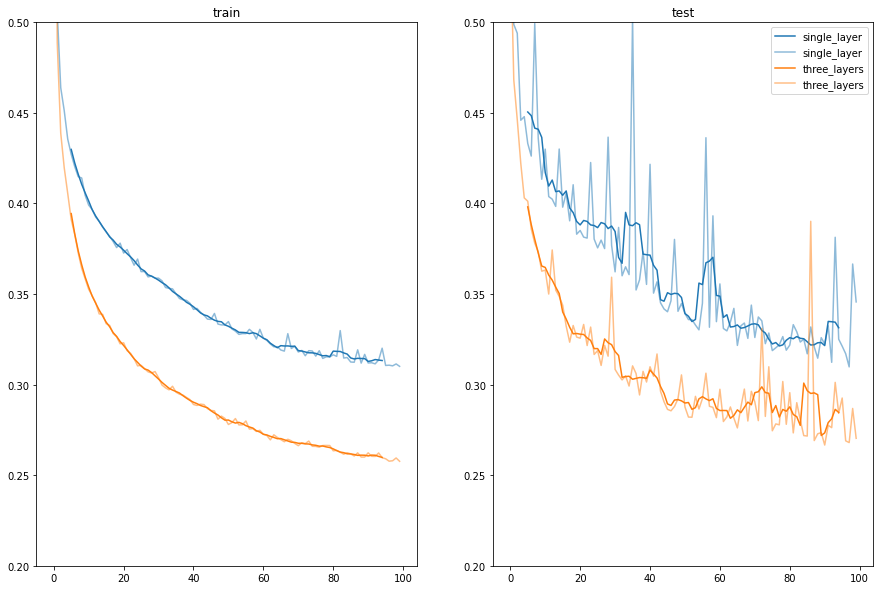

In [56]:
plot_results(result, ymin=0.2, ymax=0.5, moving=5)

That seems to be working better. It trains faster, and more accurate. Now add momentum to the SGD

In [57]:
tf.random.set_seed(42)
optimizer = tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9)

log_dir = "logs/fit/" + "momentum"
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model = Sequential([
    Dense(30, activation='relu', input_shape = X_train.shape[1:]),
    Dense(30, activation='relu'),
    Dense(30, activation='relu'),
    Dense(1)
])
model.compile(loss="mse", optimizer=optimizer)
result['momentum'] = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stop], verbose = 0)
model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 643us/step - loss: 0.2872


0.28716670918141224

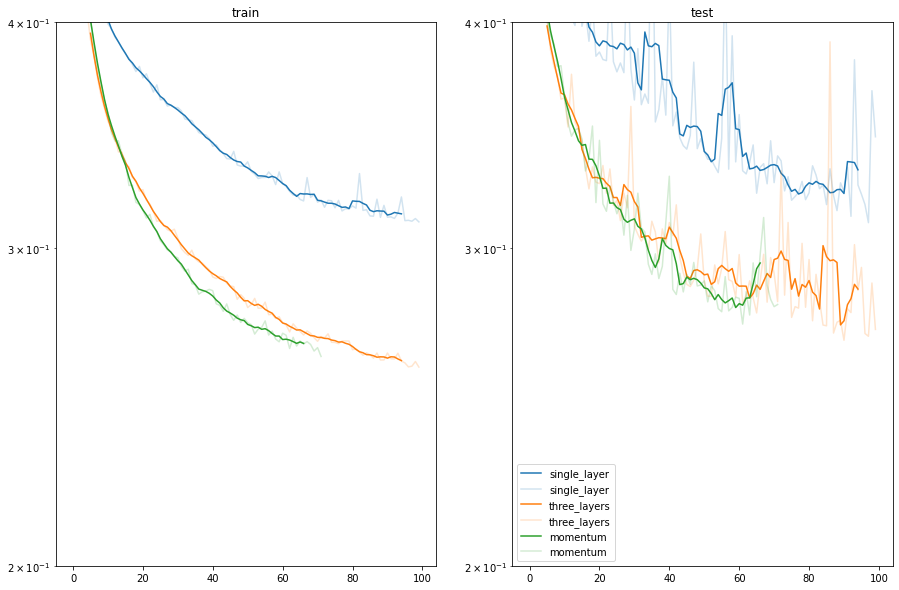

In [58]:
plot_results(result,ymin=0.2,  ymax = 0.4, yscale='log', moving=5, alpha=0.2)

It's just a little bit better, but not much. Now compare that to Adam as an optimizer.

In [59]:
tf.random.set_seed(42)
log_dir = "logs/fit/" + "Adam"
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model = Sequential([
    Dense(30, activation='relu', input_shape = X_train.shape[1:]),
    Dense(30, activation='relu'),
    Dense(30, activation='relu'),
    Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.Adam())
result['Adam'] = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stop], verbose = 0)
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 513us/step - loss: 0.2811


0.2810605405028476

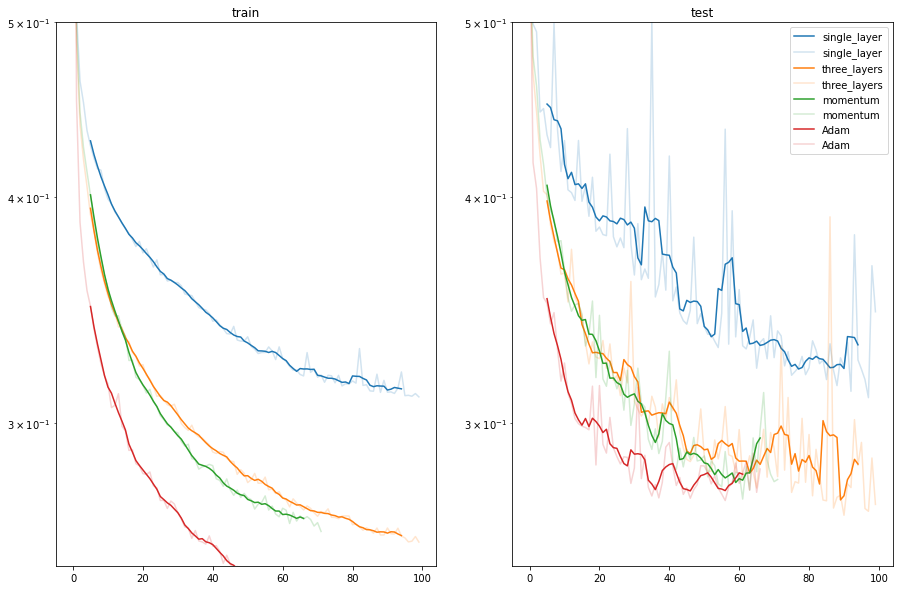

In [60]:
plot_results(result,ymin=0.25,  ymax = 0.5, yscale='log', moving=5, alpha=0.2)

This is even better.

# Hyperparameter tuning
While it is really usefull to play with different architectures to see what happens, it can easily become very time consuming. Right now, we are just considering Dense layers, but we can add all sorts of layers in different combinations. The search-space is also much too big for a naive, brute force gridsearch. Especially if we are going to add in more types of layers, each with their own parameters.

To do this more intelligent, we will use kerastuner. This implements smart ways to sample the hyperparameter space. To do this, we will have to define a more generic model, the hypermodel.


We will define ranges of hyperparameters. The input of our hypermodel will be the hyperparameters (`hp`) later on. Keras-tuner will take care of this. There are different types of hyperparameters: `Int`, `Float` , etc. All the different types can be find in the [keras documentation](https://keras-team.github.io/keras-tuner/documentation/hyperparameters/).

First, we set the range of the amount of units in every dense layer to somewhere between 32 an 96, in steps of 32.
Second, we add a for loop to add multiple dense layers, somewhere between 2 and 5 additional layers.

In [62]:
from tensorflow.keras.layers import Input

def build_model(hp):
    input = Input(shape = X_train.shape[1:])

    units = hp.Int('units', 32, 128, 32)
    #act = hp.Choice('activation', ['relu', 'elu'])
    act='relu'
    x = Dense(units, activation=act)(input)

    for i in range(hp.Int('dense_layers', 2, 5)):
        name = 'layer_{0}'.format(i)
        x = Dense(units=units, activation=act, name=name)(x)
    
    output = Dense(1)(x)
    model = keras.Model(inputs = [input], outputs = [output])
    model.compile(loss="mse", optimizer=keras.optimizers.Adam())
    return model

The [hyperband algorithm](https://jmlr.org/papers/v18/16-558.html) (image (b), configuration selection) often outperforms bayesian search (image (a), Configuration selection), at least in speed. 

<img src=https://miro.medium.com/max/1400/1*DASrFL5AZNm2YjvJEq8z8w.png width=600/>

However, according to the [No Free Lunch Theorem](https://ti.arc.nasa.gov/m/profile/dhw/papers/78.pdf) "for any algorithm, any elevated performance over one class of problems is offset by performance over another class". So, as a rule of thumb, use Hyperband, but there is no guarantee that you get the best results. We set the max_epochs low, to speed things up. We might get better results by increasing that number some, but for this tutorial it will take too long. And we can still get an improvement over what we had.

In [63]:
%%time
import kerastuner as kt
# cleaning up folders from old runs
!rm -rf ktuner 

tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=5,
    factor=3,
    directory='ktuner',
    project_name='housing',

)

tuner.search(X_train, y_train, epochs = 15, validation_data = (X_valid, y_valid))

Trial 10 Complete [00h 00m 03s]
val_loss: 0.34322692456171494

Best val_loss So Far: 0.30275576496617124
Total elapsed time: 00h 00m 26s
INFO:tensorflow:Oracle triggered exit
CPU times: user 39.2 s, sys: 7.51 s, total: 46.7 s
Wall time: 27.5 s


Note that the CPU time is about a minute in total. This is pretty fast for checking 10 configurations! We can obtain the best values from the search:

In [64]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
best_hps.values

{'units': 128,
 'dense_layers': 5,
 'tuner/epochs': 5,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

And the best model.

In [65]:
model = tuner.get_best_models()[0]
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
layer_0 (Dense)              (None, 128)               16512     
_________________________________________________________________
layer_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
layer_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
layer_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
layer_4 (Dense)              (None, 128)               16512 

And train that.

In [66]:
%%time
tf.random.set_seed(42)
log_dir = "logs/fit/" + "hyperband"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[tensorboard_callback, early_stop], verbose = 0)
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2860
CPU times: user 54.5 s, sys: 10.6 s, total: 1min 5s
Wall time: 30 s


0.2860336857479672

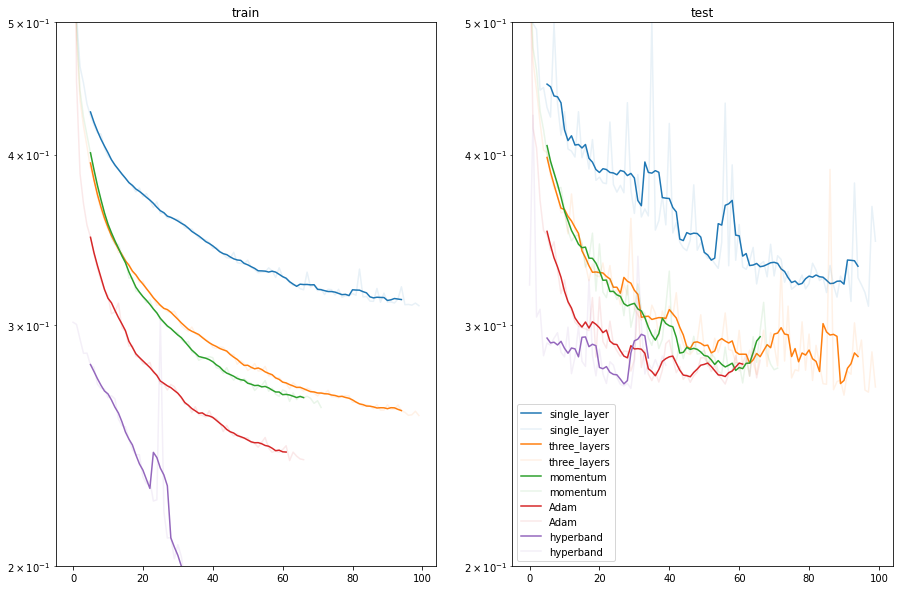

In [67]:
result['hyperband'] = history
plot_results(result, ymin=0.2, ymax = 0.5, yscale='log', moving=5, alpha=0.1)

Again, better results. Note how I have set the yscale to log.

Why not start with hypertuning directly? Because we first need to have an idea of where to search. Sure, you could start with an immmense parameter space and search that, but the chance of finding a good model will drop with the amount of space you need to search, even if you are using a smart way to search. Looking for a pebble will by much harder in the mountains and much easier in your backyard.

Let's check the bayesian optimization, just to compare.

In [68]:
%%time
# cleaning up folders from old runs
!rm -rf ktuner 

tuner = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials = 10,
    directory='ktuner',
    project_name='housing',

)
tuner.search(X_train, y_train, epochs = 3, validation_data = (X_valid, y_valid))

Trial 10 Complete [00h 00m 02s]
val_loss: 0.3475144815075305

Best val_loss So Far: 0.3318974159330669
Total elapsed time: 00h 00m 27s
INFO:tensorflow:Oracle triggered exit
CPU times: user 42 s, sys: 7.32 s, total: 49.4 s
Wall time: 28.2 s


Note how we do 10 trails, with max 3 epochs. We explore fewer options that with Hyperband, but have a longer walltime. This is a main reason to prefer Hyperband: in less time, you can explore more. 

Again, we can have a look at the best parameters

In [69]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
best_hps.values

{'units': 128, 'dense_layers': 5}

Or obtain the best model

In [70]:
model = tuner.get_best_models()[0]
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1152      
_________________________________________________________________
layer_0 (Dense)              (None, 128)               16512     
_________________________________________________________________
layer_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
layer_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
layer_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
layer_4 (Dense)              (None, 128)               16512 

With this reasonable small searchspace, the two approaches will find more or less the same architecture. However, if the searchspace is really big, hyperband will explore more of that space in less time.

In [71]:
%%time
log_dir = "logs/fit/" + "bayesian"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stop], verbose = 0)
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 956us/step - loss: 0.2864
CPU times: user 26.8 s, sys: 5.25 s, total: 32 s
Wall time: 13.8 s


0.2864309188469436

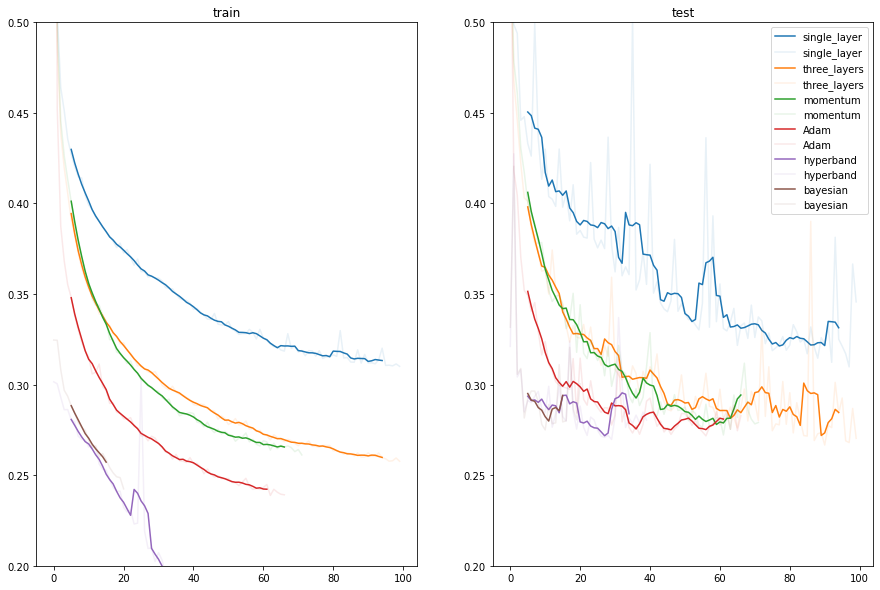

In [73]:
result['bayesian'] = history
plot_results(result, ymin=0.2, ymax=0.5, moving=5, alpha=0.1)